## Twitter Sentiments Analysis Amazon

# Note:- Only 200 Tweets are being fetched due to twitter policy so analysis is done on 200 tweets

In [1]:
# Import BAsic Packages
import os
import tweepy as tw
import pandas as pd
import numpy as np
import re
import string
from textblob import TextBlob
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
# Twitter Developer Login
consumer_key= "E5fzBzFf87iK4drDlgfpDbOVr"    
consumer_secret= "7VAz5DnMvwHuv8l8TlYIPmQOaCucKIo4k2OusMVx2lSo8xPjCj"
access_token= "1320999112280399875-5j0y9GjQj3QCQBLvveYLu2SASZeKD1"    
access_token_secret= "d8GoooR58qHo13p0L6QwMg9hvhgvKd8DuL1iIDnE6rl0G"

In [3]:
auth = tw.OAuthHandler(consumer_key, consumer_secret) # authenticate 
auth.set_access_token(access_token, access_token_secret) # auth
api = tw.API(auth, wait_on_rate_limit=True) # connection

In [4]:
posts= api.user_timeline(screen_name = input("Enter a keyword to search about: "), count = int(input("Enter how many tweets to analyse: "))
                         , lang = "en", tweet_mode = "extended")
i = 1
for tweet in posts:
    print(str(i) + ")" + tweet.full_text + "\n")
    i+=1

Enter a keyword to search about: Amazon
Enter how many tweets to analyse: 3000
1)@mshodgeinK We see you, Ms. Hodge! Keep an eye out for some packages headed your way. ❤️📦

2)@truenorojo1971 Hola, lamentamos mucho lo ocurrido. Por favor brindanos toda la información necesaria por medio del siguiente enlace para poder escalarlo con el departamento encargado: https://t.co/OfOLvSURl4. ^JG

3)@JanecekJudy You're very welcome!! This sweatshirt made some of us realize the sloth is our spirit animal, and we have you to thank for that. 😂 Here's to a warm, cozy winter! ❄️

4)@JanecekJudy You're so very welcome! We hope it'll get a lot of use, and serve as a happy reminder to slow down 😉, enjoy your break, and reflect on how awesome you are! 😊

5)@MandarPlanner We'd like to have a closer look at this, kindly share your details over the secured link here: https://t.co/cI6jPQzaaY, and we'll reach out to you.^JY

6)@gina_mantica Don't forget to floss like a boss! 😜 We wish you a pearly white new yea

In [5]:
#Create a dataFrame
df = pd.DataFrame([tweet.full_text for tweet in posts], columns = ["Tweets"])
df.head()

,Tweets
0,"@mshodgeinK We see you, Ms. Hodge! Keep an eye..."
1,"@truenorojo1971 Hola, lamentamos mucho lo ocur..."
2,@JanecekJudy You're very welcome!! This sweats...
3,@JanecekJudy You're so very welcome! We hope i...
4,@MandarPlanner We'd like to have a closer look...


In [6]:
#Clean the text
def cleanTxt(text):
    text = re.sub(r"@[_A-Za-z0-9]+", "", text)
    text = re.sub(r"#", "", text)
    text = re.sub(r"RT[\s]+", "", text) 
    text = re.sub(r"RT[\s]+", "", text) 
    text = re.sub(r"https?\/\/\s+", "", text)
    
    return text

df["Tweets"] = df["Tweets"].apply(cleanTxt)


In [7]:
def remove_punctuation(text):
    text_nopunt="".join([c for c in text if c not in string.punctuation])
    return text_nopunt

In [8]:
df['Tweets']=df['Tweets'].apply(lambda x : remove_punctuation(x))
df

,Tweets
0,We see you Ms Hodge Keep an eye out for some ...
1,Hola lamentamos mucho lo ocurrido Por favor b...
2,Youre very welcome This sweatshirt made some ...
3,Youre so very welcome We hope itll get a lot ...
4,Wed like to have a closer look at this kindly...
...,...
195,Were so excited both of your cats are enjoyin...
196,Aww shucks Youre going to make us blush We th...
197,You serious Clark Were glad you dig the sleig...
198,The sleigh is dope When conditions are right ...


In [9]:
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df["Polarity"] = df["Tweets"].apply(getPolarity)
df.head()

,Tweets,Polarity
0,We see you Ms Hodge Keep an eye out for some ...,0.000000
1,Hola lamentamos mucho lo ocurrido Por favor b...,0.000000
2,Youre very welcome This sweatshirt made some ...,0.466667
3,Youre so very welcome We hope itll get a lot ...,0.457407
4,Wed like to have a closer look at this kindly...,0.600000


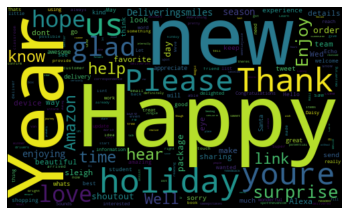

In [10]:
#Creating a wordCloud
all_words = "".join([twt for twt in df["Tweets"]])
wordCloud = WordCloud(width = 500, height = 300,random_state = 0, max_font_size = 130,collocations=False).generate(all_words)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [11]:
df

,Tweets,Polarity
0,We see you Ms Hodge Keep an eye out for some ...,0.000000
1,Hola lamentamos mucho lo ocurrido Por favor b...,0.000000
2,Youre very welcome This sweatshirt made some ...,0.466667
3,Youre so very welcome We hope itll get a lot ...,0.457407
4,Wed like to have a closer look at this kindly...,0.600000
...,...,...
195,Were so excited both of your cats are enjoyin...,0.337121
196,Aww shucks Youre going to make us blush We th...,0.450000
197,You serious Clark Were glad you dig the sleig...,0.241667
198,The sleigh is dope When conditions are right ...,0.149554


In [12]:
def getAnalysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
df["Score"] = df["Polarity"].apply(getAnalysis)
df.head()

,Tweets,Polarity,Score
0,We see you Ms Hodge Keep an eye out for some ...,0.000000,Neutral
1,Hola lamentamos mucho lo ocurrido Por favor b...,0.000000,Neutral
2,Youre very welcome This sweatshirt made some ...,0.466667,Positive
3,Youre so very welcome We hope itll get a lot ...,0.457407,Positive
4,Wed like to have a closer look at this kindly...,0.600000,Positive


In [13]:
def percentage(text,whole):
    return 100 * float(text)/float(whole)


In [14]:
#To visualize the sentiments
positive = 0
negative = 0
neutral = 0
polarity = 0
count1 = 200
for tweet in posts:
    analysis = TextBlob(tweet.full_text)
    polarity += analysis.sentiment.polarity

    if (analysis.sentiment.polarity == 0):
        neutral += 1
    elif (analysis.sentiment.polarity < 0.0):
        negative += 1
    elif (analysis.sentiment.polarity > 0.0):
        positive += 1

positive = percentage(positive,count1)
negative = percentage(negative,count1)
neutral = percentage(neutral,count1)

positive = format(positive,".2f")
neutral = format(neutral,".2f")
negative = format(negative,".2f")



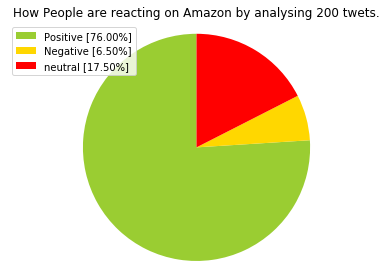

In [15]:
labels = ["Positive [" + str(positive) + "%]" , "Negative [" + str(negative) + "%]" , "neutral [" + str(neutral) + "%]"]
sizes = [positive, negative, neutral]
colors = ["yellowgreen", "gold", "red"]
patches, texts  = plt.pie(sizes, colors = colors , startangle = 90)
plt.legend(patches, labels, loc = "best")
plt.title("How People are reacting on " + "Amazon" + " by analysing " + str(count1) + " twets.")
plt.axis("equal")
plt.tight_layout()
plt.show()

## Twitter Sentiments Analysis for Flipkart

In [16]:
# Import BAsic Packages
import os
import tweepy as tw
import pandas as pd
import numpy as np
import re
import string
from textblob import TextBlob
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image

In [17]:
# Twitter Developer Login
consumer_key= "3cxAz7qcPPjEr8B4ifRcOkIIR"    
consumer_secret= "nr1vaoz4S2YS7HEDlhVlgWowf5gSt4SRn3b1LLveErgVgXkp6A"
access_token= "1238816122729680896-v5TwZ2FYo5Mkqeg6aHR5l0rek3EpR7" 

    
access_token_secret= "ET8hqqCmD5NHYpWeCJSfSMwp9gqI7XJnBRuWeqWeJAVlQ"

In [18]:
auth = tw.OAuthHandler(consumer_key, consumer_secret) # authenticate 
auth.set_access_token(access_token, access_token_secret) # auth
api = tw.API(auth, wait_on_rate_limit=True) # connection

In [19]:
posts= api.user_timeline(screen_name = input("Enter a keyword to search about: "), count = int(input("Enter how many tweets to analyse: "))
                         , lang = "en", tweet_mode = "extended")
i = 1
for tweet in posts:
    print(str(i) + ")" + tweet.full_text + "\n")
    i+=1

Enter a keyword to search about: Flipkart
Enter how many tweets to analyse: 3000
1)Presenting the brand new 6 in 1 grooming kit from boAt. Get ready to style your raw.

2)We are delighted to bring to you something exciting to look forward to in the new year! Can you guess what it is?

3)Ring in the New Year with your SuperCoin balance. Check now on the SuperCoin Zone and treat yourself to exciting rewards from 100+ brand ! Explore now!

4)Update not outdate! Flipkart is here to you enhance your electronics. The Nokia Media Streamer levels up your viewing experience without making a hole in your pocket. Here are some tech tips on using it. Just log into Flipkart and get the latest in tech. https://t.co/ztDZsz5cf6

5)Get ready for a new murder mystery every day! 
Catch the killer yourself on @FlipkartVideo's upcoming show: Kaun? Who did it? A unique interactive crime show, daily from the 9th of Jan. Watch, Play, and Win, only on the #FlipkartApp https://t.co/l9YNiHDr4H

6)Let the little 

In [20]:
#Create a dataFrame
df = pd.DataFrame([tweet.full_text for tweet in posts], columns = ["Tweets"])
df.head()

,Tweets
0,Presenting the brand new 6 in 1 grooming kit f...
1,We are delighted to bring to you something exc...
2,Ring in the New Year with your SuperCoin balan...
3,Update not outdate! Flipkart is here to you en...
4,Get ready for a new murder mystery every day! ...


In [21]:
#Clean the text
def cleanTxt(text):
    text = re.sub(r"@[_A-Za-z0-9]+", "", text)
    text = re.sub(r"#", "", text)
    text = re.sub(r"RT[\s]+", "", text) 
    text = re.sub(r"RT[\s]+", "", text) 
    text = re.sub(r"https?\/\/\s+", "", text)
    
    return text

df["Tweets"] = df["Tweets"].apply(cleanTxt)


In [22]:
def remove_punctuation(text):
    text_nopunt="".join([c for c in text if c not in string.punctuation])
    return text_nopunt

In [23]:
df['Tweets']=df['Tweets'].apply(lambda x : remove_punctuation(x))
df

,Tweets
0,Presenting the brand new 6 in 1 grooming kit f...
1,We are delighted to bring to you something exc...
2,Ring in the New Year with your SuperCoin balan...
3,Update not outdate Flipkart is here to you enh...
4,Get ready for a new murder mystery every day \...
...,...
195,Kya baat hain 👏🏼👏🏼👏🏼
196,No code required A new FlashSale comes out ev...
197,You know what to do 👔👖
198,Just missed it 🙊\nThe sale ended at 1am But w...


In [24]:
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df["Polarity"] = df["Tweets"].apply(getPolarity)
df.head()

,Tweets,Polarity
0,Presenting the brand new 6 in 1 grooming kit f...,0.035198
1,We are delighted to bring to you something exc...,0.378788
2,Ring in the New Year with your SuperCoin balan...,0.218182
3,Update not outdate Flipkart is here to you enh...,0.500000
4,Get ready for a new murder mystery every day \...,0.251894


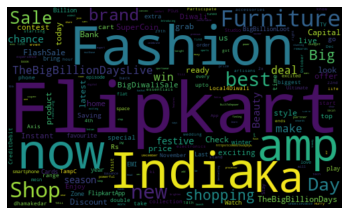

In [25]:
#Creating a wordCloud
all_words = "".join([twt for twt in df["Tweets"]])
wordCloud = WordCloud(width = 500, height = 300,random_state = 0, max_font_size = 130,collocations=False).generate(all_words)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [26]:
df

,Tweets,Polarity
0,Presenting the brand new 6 in 1 grooming kit f...,0.035198
1,We are delighted to bring to you something exc...,0.378788
2,Ring in the New Year with your SuperCoin balan...,0.218182
3,Update not outdate Flipkart is here to you enh...,0.500000
4,Get ready for a new murder mystery every day \...,0.251894
...,...,...
195,Kya baat hain 👏🏼👏🏼👏🏼,0.000000
196,No code required A new FlashSale comes out ev...,0.136364
197,You know what to do 👔👖,0.000000
198,Just missed it 🙊\nThe sale ended at 1am But w...,0.136364


In [27]:
def getAnalysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
df["Score"] = df["Polarity"].apply(getAnalysis)
df.head()

,Tweets,Polarity,Score
0,Presenting the brand new 6 in 1 grooming kit f...,0.035198,Positive
1,We are delighted to bring to you something exc...,0.378788,Positive
2,Ring in the New Year with your SuperCoin balan...,0.218182,Positive
3,Update not outdate Flipkart is here to you enh...,0.500000,Positive
4,Get ready for a new murder mystery every day \...,0.251894,Positive


In [28]:
def percentage(text,whole):
    return 100 * float(text)/float(whole)


In [29]:
#To visualize the sentiments
positive = 0
negative = 0
neutral = 0
polarity = 0
count1 = 100
for tweet in posts:
    analysis = TextBlob(tweet.full_text)
    polarity += analysis.sentiment.polarity

    if (analysis.sentiment.polarity == 0):
        neutral += 1
    elif (analysis.sentiment.polarity < 0.0):
        negative += 1
    elif (analysis.sentiment.polarity > 0.0):
        positive += 1

positive = percentage(positive,count1)
negative = percentage(negative,count1)
neutral = percentage(neutral,count1)

positive = format(positive,".2f")
neutral = format(neutral,".2f")
negative = format(negative,".2f")



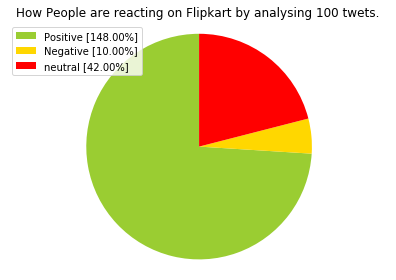

In [30]:
labels = ["Positive [" + str(positive) + "%]" , "Negative [" + str(negative) + "%]" , "neutral [" + str(neutral) + "%]"]
sizes = [positive, negative, neutral]
colors = ["yellowgreen", "gold", "red"]
patches, texts  = plt.pie(sizes, colors = colors , startangle = 90)
plt.legend(patches, labels, loc = "best")
plt.title("How People are reacting on " + "Flipkart" + " by analysing " + str(count1) + " twets.")
plt.axis("equal")
plt.tight_layout()
plt.show()

## Twitter Sentiments Analysis for Snapdeal


In [31]:
# Import BAsic Packages
import os
import tweepy as tw
import pandas as pd
import numpy as np
import re
import string
from textblob import TextBlob
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image

In [32]:
# Twitter Developer Login
consumer_key= "3cxAz7qcPPjEr8B4ifRcOkIIR"    
consumer_secret= "nr1vaoz4S2YS7HEDlhVlgWowf5gSt4SRn3b1LLveErgVgXkp6A"
access_token= "1238816122729680896-v5TwZ2FYo5Mkqeg6aHR5l0rek3EpR7" 

    
access_token_secret= "ET8hqqCmD5NHYpWeCJSfSMwp9gqI7XJnBRuWeqWeJAVlQ"

In [33]:
auth = tw.OAuthHandler(consumer_key, consumer_secret) # authenticate 
auth.set_access_token(access_token, access_token_secret) # auth
api = tw.API(auth, wait_on_rate_limit=True) # connection

In [34]:
posts= api.user_timeline(screen_name = input("Enter a keyword to search about: "), count = int(input("Enter how many tweets to analyse: "))
                         , lang = "en", tweet_mode = "extended")
i = 1
for tweet in posts:
    print(str(i) + ")" + tweet.full_text + "\n")
    i+=1

Enter a keyword to search about: Snapdeal 
Enter how many tweets to analyse: 3000
1)RT @1kunalbahl: Looks like someone @snapdeal didn't the miss the opportunity to subtly make their disdain for 2020 known...right on the hom…

2)RT @forbes_india: #2021LivingInHope As we stayed home and physical businesses remained shut, we relied on ecommerce for all our needs. @sna…

3)An arrestingly powerful design. 
Buy now: https://t.co/JIEdw2EDWo
#ShopFromYourHome https://t.co/lSLitieVuh

4)For the perfect moment to make you more special. 😍
Buy now: https://t.co/gNtXpceN0L
#ShopFromYourHome https://t.co/fGJq6p42ze

5)Wear the smartest deal of the day! 
⌚️⌚️ https://t.co/xTDdjhnGcO
#ShopFromYourHome https://t.co/cxyyC2zllJ

6)Perfect for celebrations. 😎
👉 https://t.co/zA54ulUZIz
#ShopFromYourHome https://t.co/jGwOsors5V

7)A treat for your feet! 😊
👉 https://t.co/PLsEhOwEEC

#ShopFromYourHome https://t.co/mCSDIuXABb

8)😃 Your closet has a need to own this look!
👉 https://t.co/4Fc24zP3Yj
#ShopFromYour

In [35]:
#Create a dataFrame
df = pd.DataFrame([tweet.full_text for tweet in posts], columns = ["Tweets"])
df.head()

,Tweets
0,RT @1kunalbahl: Looks like someone @snapdeal d...
1,RT @forbes_india: #2021LivingInHope As we stay...
2,An arrestingly powerful design. \nBuy now: htt...
3,For the perfect moment to make you more specia...
4,Wear the smartest deal of the day! \n⌚️⌚️ http...


In [36]:
#Clean the text
def cleanTxt(text):
    text = re.sub(r"@[_A-Za-z0-9]+", "", text)
    text = re.sub(r"#", "", text)
    text = re.sub(r"RT[\s]+", "", text) 
    text = re.sub(r"RT[\s]+", "", text) 
    text = re.sub(r"https?\/\/\s+", "", text)
    
    return text

df["Tweets"] = df["Tweets"].apply(cleanTxt)


In [37]:
def remove_punctuation(text):
    text_nopunt="".join([c for c in text if c not in string.punctuation])
    return text_nopunt

In [38]:
df['Tweets']=df['Tweets'].apply(lambda x : remove_punctuation(x))
df

,Tweets
0,Looks like someone didnt the miss the opport...
1,2021LivingInHope As we stayed home and physic...
2,An arrestingly powerful design \nBuy now https...
3,For the perfect moment to make you more specia...
4,Wear the smartest deal of the day \n⌚️⌚️ https...
...,...
195,Get 75 Instant discount using Credit Cards Sh...
196,All for your little one 👶 👼 \n👉 httpstcox6SCd1...
197,A decade of enabling India’s small businesses ...
198,Order healthcare devices from the safety of yo...


In [39]:
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df["Polarity"] = df["Tweets"].apply(getPolarity)
df.head()

,Tweets,Polarity
0,Looks like someone didnt the miss the opport...,-0.333333
1,2021LivingInHope As we stayed home and physic...,0.000000
2,An arrestingly powerful design \nBuy now https...,0.300000
3,For the perfect moment to make you more specia...,0.619048
4,Wear the smartest deal of the day \n⌚️⌚️ https...,0.000000


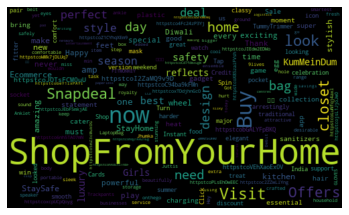

In [40]:
#Creating a wordCloud
all_words = "".join([twt for twt in df["Tweets"]])
wordCloud = WordCloud(width = 500, height = 300,random_state = 0, max_font_size = 130,collocations=False).generate(all_words)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [41]:
df

,Tweets,Polarity
0,Looks like someone didnt the miss the opport...,-0.333333
1,2021LivingInHope As we stayed home and physic...,0.000000
2,An arrestingly powerful design \nBuy now https...,0.300000
3,For the perfect moment to make you more specia...,0.619048
4,Wear the smartest deal of the day \n⌚️⌚️ https...,0.000000
...,...,...
195,Get 75 Instant discount using Credit Cards Sh...,0.000000
196,All for your little one 👶 👼 \n👉 httpstcox6SCd1...,-0.187500
197,A decade of enabling India’s small businesses ...,0.137500
198,Order healthcare devices from the safety of yo...,0.000000


In [42]:
def getAnalysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
df["Score"] = df["Polarity"].apply(getAnalysis)
df.head()

,Tweets,Polarity,Score
0,Looks like someone didnt the miss the opport...,-0.333333,Negative
1,2021LivingInHope As we stayed home and physic...,0.000000,Neutral
2,An arrestingly powerful design \nBuy now https...,0.300000,Positive
3,For the perfect moment to make you more specia...,0.619048,Positive
4,Wear the smartest deal of the day \n⌚️⌚️ https...,0.000000,Neutral


In [43]:
def percentage(text,whole):
    return 100 * float(text)/float(whole)


In [44]:
#To visualize the sentiments
positive = 0
negative = 0
neutral = 0
polarity = 0
count1 = 100
for tweet in posts:
    analysis = TextBlob(tweet.full_text)
    polarity += analysis.sentiment.polarity

    if (analysis.sentiment.polarity == 0):
        neutral += 1
    elif (analysis.sentiment.polarity < 0.0):
        negative += 1
    elif (analysis.sentiment.polarity > 0.0):
        positive += 1

positive = percentage(positive,count1)
negative = percentage(negative,count1)
neutral = percentage(neutral,count1)

positive = format(positive,".2f")
neutral = format(neutral,".2f")
negative = format(negative,".2f")



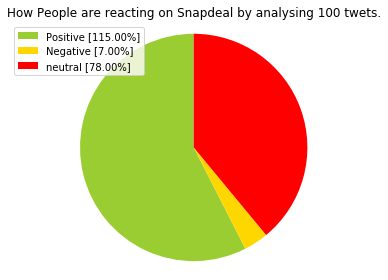

In [45]:
labels = ["Positive [" + str(positive) + "%]" , "Negative [" + str(negative) + "%]" , "neutral [" + str(neutral) + "%]"]
sizes = [positive, negative, neutral]
colors = ["yellowgreen", "gold", "red"]
patches, texts  = plt.pie(sizes, colors = colors , startangle = 90)
plt.legend(patches, labels, loc = "best")
plt.title("How People are reacting on " + "Snapdeal" + " by analysing " + str(count1) + " twets.")
plt.axis("equal")
plt.tight_layout()
plt.show()

##### END